# CS105 Mini-Project

For this project, we designed and conducted a survey targeting students from CS105, CS111, and CS010C classes to examine their caffeine consumption. Our objective was to gain insight into their daily habits, and to see if we could extrapolate any interesting conclusions from our data.

## What is our data about?

Our data focuses on students' caffeine consumption and its relationship to their lifestyle and health habits. It includes information on how frequently students consume caffeine, their preferred sources (such as coffee, energy drinks, or tea), and additional factors like sleep patterns, energy levels throughout the day, and other health-related behaviors. By analyzing this data, we aim to uncover connections between caffeine use and students' overall well-being, examining how it influences their sleep quality, daily energy levels, and possibly other health impacts.

## What would we like to know about our data?

We aim to learn how caffeine consumption affects students' daily routines, particularly regarding their sleep quality, energy levels, and overall health. By examining the frequency and sources of caffeine intake, along with lifestyle factors like sleep habits and other health behaviors, we hope to identify patterns that may reveal how caffeine influences students' physical and mental well-being. Additionally, we want to see if there are any notable trends among students in terms of their dependency on caffeine for focus and energy, helping us better understand the potential impacts of caffeine on their academic and personal lives.

## Data Exploration/Analysis

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data/CleanedResponses.csv")

### FIXME: REPLACE WITH APPROPRIATE TITLE FOR TEST (SARBESH)

In [70]:
# Sarbesh's portion (whatever test you'd like) bar plot

### FIXME: REPLACE WITH APPROPRIATE TITLE FOR TEST (ZIFENG)

In [71]:
# Zifeng's portion (chi-squared test) heat map

We are interested in the relationship between gender and preference for types of caffeinated beverages. So we plan to conduct a chi-square test.

Null hypothesis: two attributes, gender and type of caffeinated drink are independent.

Alternative Hypothesis: two attributes, gender and type of caffeinated drink are correlated.

In [46]:
responses = df.copy()
responses["caffeineType"] = responses['caffeineType'].fillna('None')
df_gender_type = responses[['gender', 'caffeineType']]
type_gender = pd.crosstab(df_gender_type["caffeineType"], df_gender_type["gender"])
type_gender

gender,Female,Male,Non-binary,Prefer not to say,Transfem
caffeineType,,,,,
Coffee,11,23,0,0,0
"Coffee, Energy drink",4,14,0,0,0
Energy drink,5,19,0,0,0
"Energy drink, Matcha",0,1,0,0,0
"Energy drink, None",0,1,0,0,0
"Energy drink, soda",0,0,1,0,0
None,12,45,0,3,0
Other,3,4,0,0,0
Tea,8,14,0,1,1


In [47]:
# calculate the chi-square value of the dataset
from scipy.stats import chi2_contingency

chi, p, dfree, expected = chi2_contingency(type_gender)

print("calculated chi square value: ", chi)
print("calculated p value: ", p)
print("degree of freedom: ", dfree)

calculated chi square value:  117.58993106742544
calculated p value:  1.2962884266012364e-05
degree of freedom:  60


In [48]:
# get the threshold to reject the hypothesis by certain significance value and the degree of the freedom.
from scipy.stats import chi2
print("for 60 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level:")
chi2.ppf(0.95, 60)

for 60 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level:


79.08194448784874

The chi-squared value we calculated is 117.59. The p value is 1.296. The degree of freedom is 60. We choose the significance level alpha to be 0.05. The critical value we calculated is 79.08

Since the chi-squared value 117.59 is greater than the critical value 79.08, we reject the null hypothesis. This means that gender and type of caffeinated drink are correlated.

Now that we know there is a relationship between gender and preference for types of caffeinated beverages, we want to understand the nature of this relationship more deeply. So, we have created a heatmap.

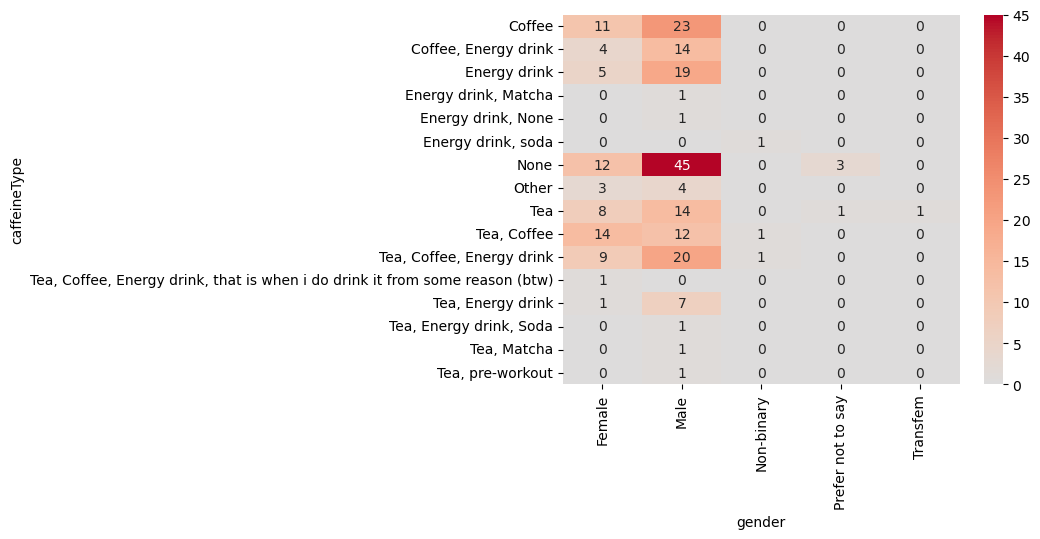

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(type_gender, center= 0, cmap = "coolwarm",annot= True)
plt.show()

This heatmap displays the distribution of caffeine preferences among different gender identities. We see that male participants who do not consume any types of caffeinated drink were by far the most common. We can also observe that consuming coffee alone and consuming both tea, coffee, and energy drinks, are popular choices among male participants. For female participants, popular options include consuming coffee alone, not consuming any caffeine, and consuming both tea and coffee.

Going further, we want to know if one gender prefers a certain type of caffeinated beverage more than the other gender. So, we have created a stacked bar chart. We extracted the types of caffeinated beverages from the mixed-type options and added them to their corresponding categories.

In [53]:
gender_type = pd.crosstab(df_gender_type["gender"], df_gender_type["caffeineType"])
gender_type_cleaned = gender_type.copy()
gender_type_cleaned["Coffee"] = gender_type_cleaned["Coffee"] + gender_type_cleaned["Coffee, Energy drink"] + gender_type_cleaned["Tea, Coffee"] + gender_type_cleaned["Tea, Coffee, Energy drink"] + gender_type_cleaned["Tea, Coffee, Energy drink, that is when i do drink it from some reason (btw)"]
gender_type_cleaned["Tea"] = gender_type_cleaned["Tea"] + gender_type_cleaned["Tea, Coffee"] + gender_type_cleaned["Tea, Coffee, Energy drink"] + gender_type_cleaned["Tea, Coffee, Energy drink, that is when i do drink it from some reason (btw)"] + gender_type_cleaned["Tea, Energy drink"] + gender_type_cleaned["Tea, Energy drink, Soda"] + gender_type_cleaned["Tea, Matcha"] + gender_type_cleaned["Tea, pre-workout"]
gender_type_cleaned["Energy drink"] = gender_type_cleaned["Energy drink"] + gender_type_cleaned["Coffee, Energy drink"] + gender_type_cleaned["Energy drink, Matcha"] + gender_type_cleaned["Energy drink, None"] + gender_type_cleaned["Energy drink, soda"] + gender_type_cleaned["Tea, Coffee, Energy drink"] + gender_type_cleaned["Tea, Coffee, Energy drink, that is when i do drink it from some reason (btw)"] + gender_type_cleaned["Tea, Energy drink"] + gender_type_cleaned["Tea, Energy drink, Soda"]
gender_type_cleaned["Soda"] = gender_type_cleaned["Energy drink, soda"] + gender_type_cleaned["Tea, Energy drink, Soda"]
gender_type_cleaned["Matcha"] = gender_type_cleaned["Energy drink, Matcha"] + gender_type_cleaned["Tea, Matcha"]
gender_type_cleaned = gender_type_cleaned[["Coffee", "Tea", "Energy drink", "Soda", "Matcha", "None", "Other"]]
gender_type_cleaned

caffeineType,Coffee,Tea,Energy drink,Soda,Matcha,None,Other
gender,,,,,,,
Female,39,33,20,0,0,12,3
Male,69,56,63,1,2,45,4
Non-binary,2,2,2,1,0,0,0
Prefer not to say,0,1,0,0,0,3,0
Transfem,0,1,0,0,0,0,0


In [54]:
gender_counts = gender_type_cleaned.sum(axis=1)
type_given_gender = gender_type_cleaned.divide(gender_counts, axis=0)
type_given_gender

caffeineType,Coffee,Tea,Energy drink,Soda,Matcha,None,Other
gender,,,,,,,
Female,0.364486,0.308411,0.186916,0.000000,0.000000,0.11215,0.028037
Male,0.287500,0.233333,0.262500,0.004167,0.008333,0.18750,0.016667
Non-binary,0.285714,0.285714,0.285714,0.142857,0.000000,0.00000,0.000000
Prefer not to say,0.000000,0.250000,0.000000,0.000000,0.000000,0.75000,0.000000
Transfem,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000


<Axes: xlabel='gender'>

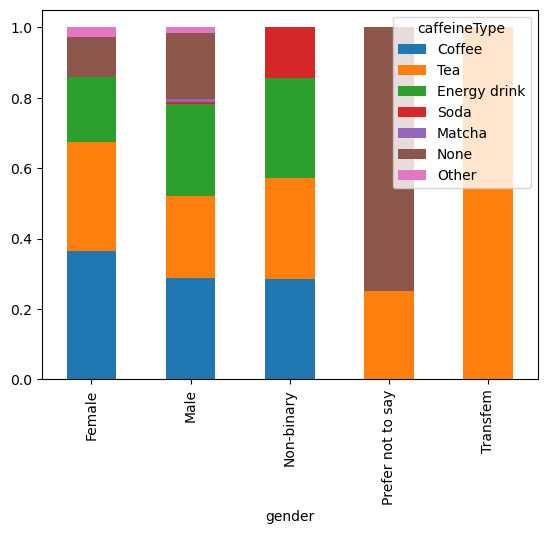

In [55]:
type_given_gender.plot.bar(stacked=True)

This graph displays the conditional distribution of the type of caffeinated drink, given the gender. From this, we can see that different genders have different preferences for types of caffeinated beverages. We observe that female participants have a higher proportion of consuming coffee and tea compared to male participants. Conversely, male participants have a higher proportion of consuming energy drinks and not consuming any caffeine compared to female participants. We can conclude that female participants tend to prefer consuming caffeinated beverages, particularly coffee and tea, while male participants show a greater preference for consuming energy drinks than female participants.

### FIXME: REPLACE WITH APPROPRIATE TITLE FOR TEST (JOEL)

In [72]:
# Joel's portion (correlation analysis) scatterplot

### FIXME: REPLACE WITH APPROPRIATE TITLE FOR TEST (SARAH)

In [73]:
# Sarah's portion (whatever test you'd like)

## Conclusions

THIS IS FOR RICHARD